<a href="https://colab.research.google.com/github/UICodes89/Machine_Learning/blob/master/EDA_Outlier_Finding_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###EDA
- Boston Dataset
- Box Plot
- Scatter Plot
- Z Score
- IQR Scrore

* Dataset is used Boston house pricing scikit preload dataset.



##Load Data

In [0]:
import pandas as pd
from sklearn import datasets
boston= datasets.load_boston()


##Print Shape and inital data values!!!

In [49]:
print(boston.data.shape)

(506, 13)


In [0]:
x = boston.data
y  = boston.target
column = boston.feature_names

##Convert Boston data in to dataframes.

In [0]:
boston_df = pd.DataFrame(boston.data)
boston_df.columns = column

In [52]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


####BOX PLOT

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Check corelation between variables

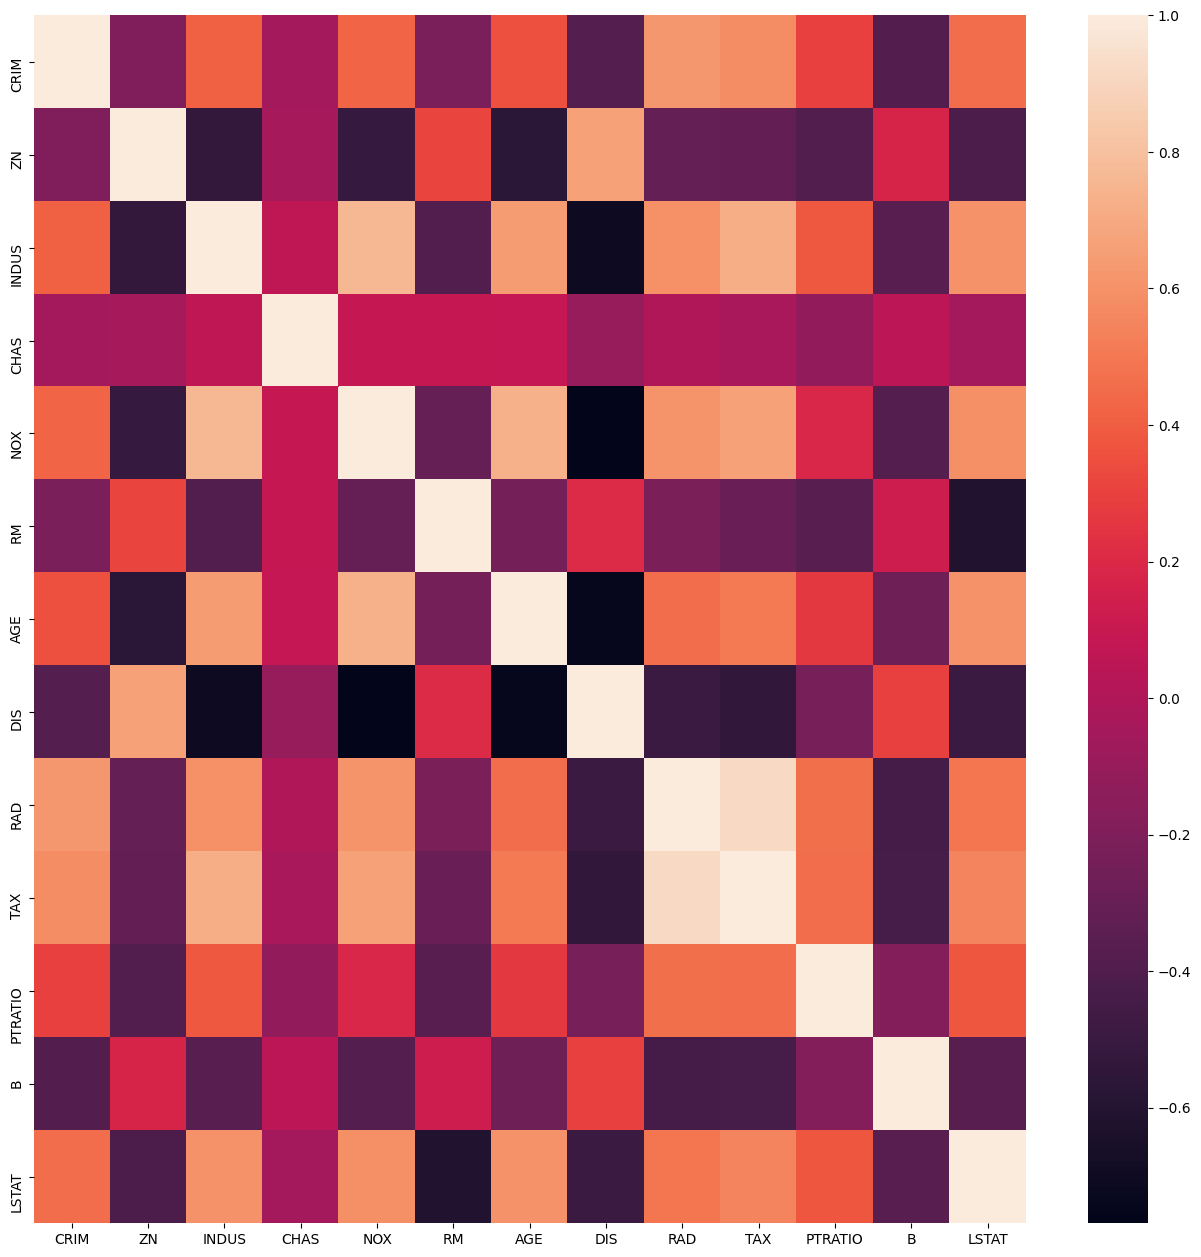

In [71]:
plt.figure(figsize=(16, 16), dpi=100)
sns.heatmap(boston_df.corr())

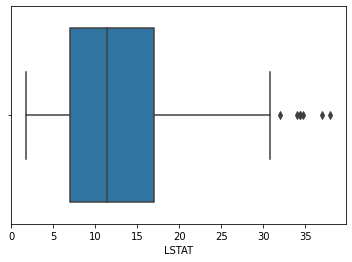

In [72]:
sns.boxplot(x=boston_df['LSTAT'])

###Scatter Plot
A scatter plot , is a type of plot, mathematical using cartesian coordinates to display values of two variables.

[]

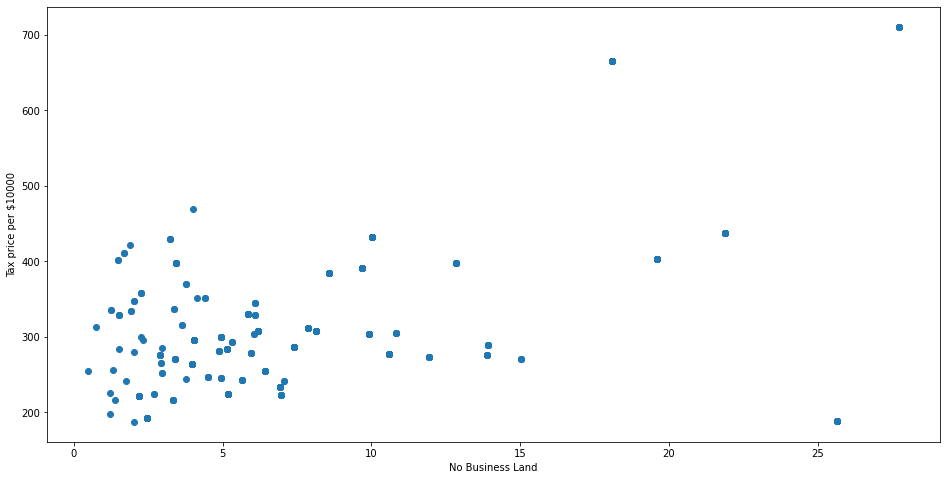

In [75]:
figure, ax = plt.subplots(figsize=(16, 8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel("No Business Land")
ax.set_ylabel("Tax price per $10000")
plt.plot()

In [0]:
from scipy import stats
import numpy as np

In [77]:
z = np.abs(stats.zscore(boston_df))
threshold = 3
print(np.where(z > 3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

In [0]:
boston_df_o1 = boston_df

In [0]:
Q1 = boston_df_o1.quantile(0.25)
Q3 = boston_df_o1.quantile(0.75)

In [80]:
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [81]:
print(boston_df_o1 < (Q1 - 1.5 * IQR)) | (boston_df_o1 > (Q3 + 1.5 * IQR))

      CRIM     ZN  INDUS   CHAS    NOX  ...    RAD    TAX  PTRATIO      B  LSTAT
0    False  False  False  False  False  ...  False  False    False  False  False
1    False  False  False  False  False  ...  False  False    False  False  False
2    False  False  False  False  False  ...  False  False    False  False  False
3    False  False  False  False  False  ...  False  False    False  False  False
4    False  False  False  False  False  ...  False  False    False  False  False
..     ...    ...    ...    ...    ...  ...    ...    ...      ...    ...    ...
501  False  False  False  False  False  ...  False  False    False  False  False
502  False  False  False  False  False  ...  False  False    False  False  False
503  False  False  False  False  False  ...  False  False    False  False  False
504  False  False  False  False  False  ...  False  False    False  False  False
505  False  False  False  False  False  ...  False  False    False  False  False

[506 rows x 13 columns]


TypeError: ignored

##Working with Outliers: Correcting, Removing

In [63]:
boston_df_o = boston_df_o[(z < 3).all(axis=1)]

IndexError: ignored